# Multiple Linear Regression

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [9]:
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
df.shape

(200, 4)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


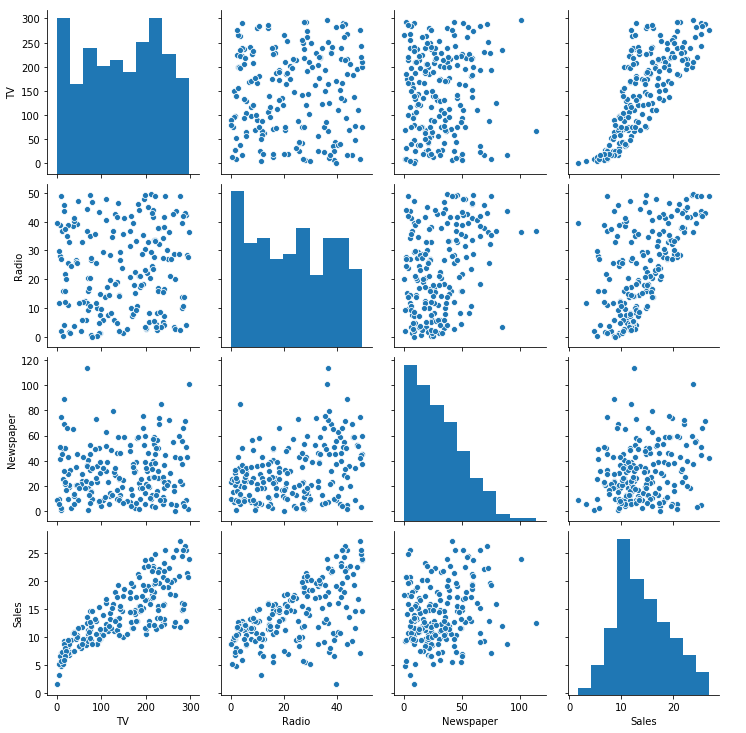

In [15]:
import seaborn as sns
sns.pairplot(df)

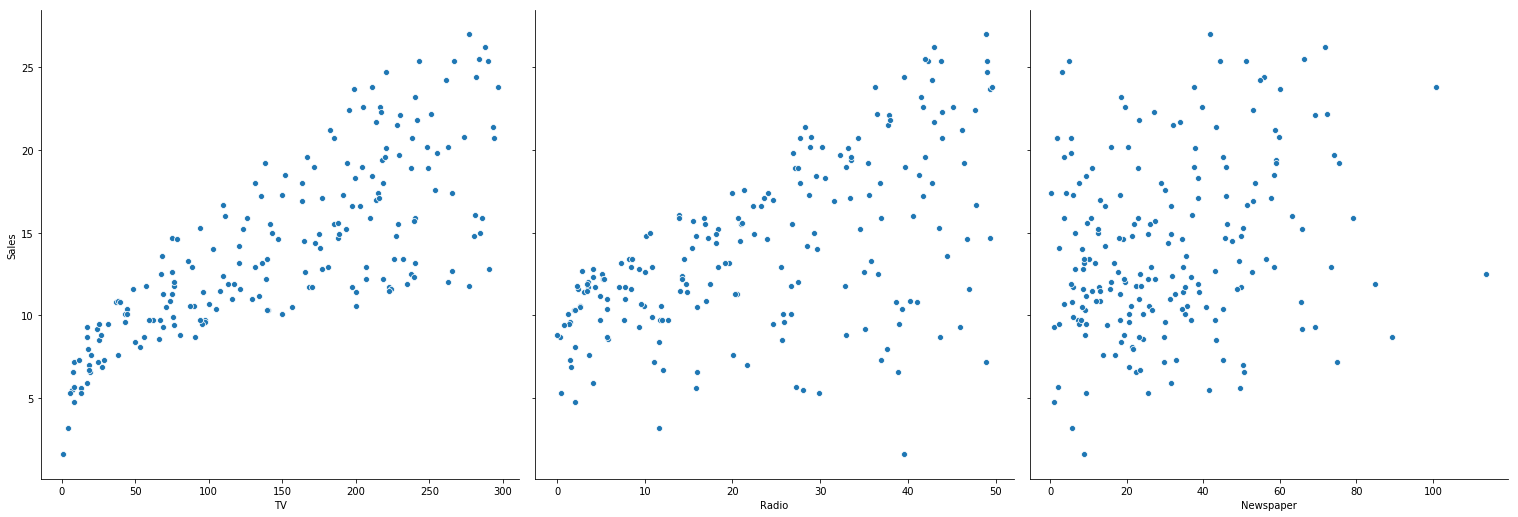

In [17]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=7)

In [18]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [19]:
type(x)

pandas.core.frame.DataFrame

In [22]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [23]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [25]:
x_train.head()

,TV,Radio,Newspaper
74,213.4,24.6,13.1
3,151.5,41.3,58.5
185,205.0,45.1,19.6
26,142.9,29.3,12.6
90,134.3,4.9,9.3


In [28]:
type(x_train),type(x_test),type(y_train),type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
mlr=LinearRegression()
mlr.fit(x_train,y_train)


LinearRegression()

In [31]:
mlr.intercept_

2.652789668879498

In [32]:
mlr.coef_

array([0.0454256 , 0.18975773, 0.00460308])

In [34]:
coef=pd.DataFrame(mlr.coef_,x_test.columns,columns=['Coefficient'])
coef

,Coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


for every 1 unit increase in TV sales goes up by 0.045

# Predictions

In [35]:
y_pred=mlr.predict(x_test)

In [36]:
type(y_pred)

numpy.ndarray

In [37]:
np.array(y_test)

array([ 6.6, 20.7, 17.2, 19.4, 21.8, 12.2, 12.2, 11.7, 22.6, 22.3, 11.9,
       19.7,  8.7, 15.6, 10.6,  9.7, 17.3, 11.7, 18. , 11.9, 17.4, 11. ,
       22.4, 17.1, 15.5, 24.7, 19.6, 11.3, 20.7, 15.2, 13.6,  9.3, 11.6,
       14.9,  8.4, 14.2,  9.6, 11.7, 11.5, 15.2, 17.1, 14.1, 14.5, 12.2,
       13.2, 10.6,  8.7, 18.9, 10.5,  7.6, 16.6, 19. , 12.6, 18. , 18.4,
       10.4,  5.9,  9.5, 16.6, 13.3])

In [38]:
y_pred

array([10.62160072, 20.00625302, 16.91850882, 19.17040746, 20.94974131,
       13.12284284, 11.80740696, 12.32019766, 20.57806782, 20.95662688,
       10.79096475, 19.54868702,  6.42403866, 15.23133391,  8.97226257,
        7.89897862, 16.23599497, 12.02636477, 17.09702178, 11.26080277,
       16.97826292,  9.75655721, 20.82389762, 17.20916742, 15.13816239,
       21.97290698, 19.20181841, 10.07501899, 19.39017185, 14.8673761 ,
       14.36798893,  7.55604543,  9.96742165, 14.76342565,  7.20995576,
       13.60003295,  7.49088656, 11.70865932, 13.46091883, 15.2229793 ,
       17.18088277, 13.56738329, 14.30942267, 13.72909849, 11.88559349,
        8.77039705, 12.1244102 , 19.20252289,  9.08376601,  5.15367352,
       16.22852749, 18.14111213, 12.94835466, 16.86274503, 17.86462435,
       12.33930625,  4.3575739 , 11.25904494, 16.11560622, 13.56602169])

In [40]:
c=[i for i in range(1,61)]

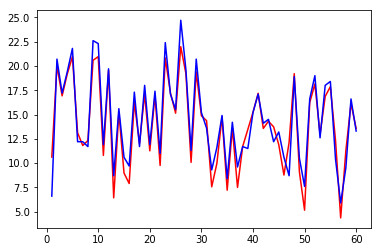

In [42]:
import matplotlib.pyplot as plt
plt.plot(c,y_pred,'r-',c,y_test,'b-')

In [43]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [45]:
mse,r2
#i.e only 1.8% predicted values are different from the test values and r2 is close to one as well

(1.8506819941636963, 0.9058622107532246)

In [46]:
import statsmodels.api as sm

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [47]:
x_train_sm=x_train
x_train_sm=sm.add_constant(x_train_sm)
mlr_sm=sm.OLS(y_train,x_train_sm).fit()
mlr_sm.params

const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [48]:
print(mlr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Thu, 28 May 2020   Prob (F-statistic):           9.97e-66
Time:                        23:45:08   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

if the value of P for a column is greater than 0.05 we neglect that column

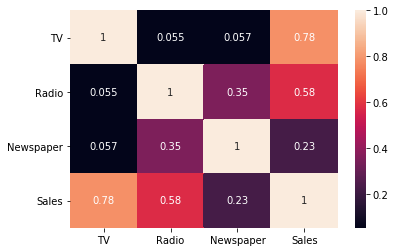

In [49]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

we can see we have positive corelation of Sales with the TV and very less corelation with Newspaper.
Correlation above 0.7 is considered good


In [50]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


# Hence we can remove the Newspaper Column as it is not much afftecting the Sales

In [54]:
x_train=x_train[['TV','Radio']]
x_test=x_test[['TV','Radio']]

In [55]:
mlr=mlr.fit(x_train,y_train)

In [59]:
y_pred_new=mlr.predict(x_test)

In [61]:
y_pred_new

array([10.56198847, 20.16735504, 16.90186462, 19.07993718, 21.03892699,
       13.13621118, 11.80982028, 12.39007729, 20.59914742, 21.04083466,
       10.88508869, 19.38624121,  6.37517955, 15.33164571,  8.96088175,
        7.95144449, 16.38791571, 11.97017124, 17.24725749, 11.20901475,
       17.11470022,  9.70819803, 20.79788275, 17.20749366, 15.18035107,
       22.18189008, 19.17555656, 10.05518823, 19.5883307 , 14.98424867,
       14.39922454,  7.65095995,  9.84543862, 14.78150095,  7.22855505,
       13.69168479,  7.43358375, 11.75347003, 13.50004784, 15.057806  ,
       17.06957807, 13.68351323, 14.23222825, 13.70744537, 11.96487996,
        8.70898678, 11.90028246, 19.26409026,  9.01348371,  5.17060846,
       16.23196722, 18.16063096, 12.87565806, 16.92691617, 17.99125313,
       12.31004629,  4.29140991, 11.39172539, 16.20134352, 13.51229884])

In [63]:
np.array(y_test)

array([ 6.6, 20.7, 17.2, 19.4, 21.8, 12.2, 12.2, 11.7, 22.6, 22.3, 11.9,
       19.7,  8.7, 15.6, 10.6,  9.7, 17.3, 11.7, 18. , 11.9, 17.4, 11. ,
       22.4, 17.1, 15.5, 24.7, 19.6, 11.3, 20.7, 15.2, 13.6,  9.3, 11.6,
       14.9,  8.4, 14.2,  9.6, 11.7, 11.5, 15.2, 17.1, 14.1, 14.5, 12.2,
       13.2, 10.6,  8.7, 18.9, 10.5,  7.6, 16.6, 19. , 12.6, 18. , 18.4,
       10.4,  5.9,  9.5, 16.6, 13.3])

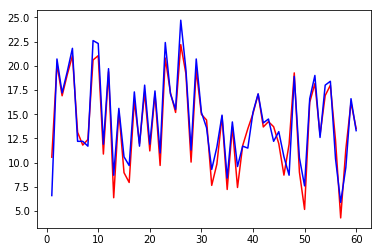

In [64]:
plt.plot(c,y_pred_new,'r-',c,y_test,'b-')

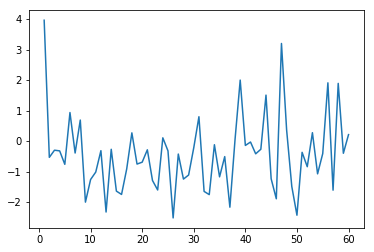

In [65]:
plt.plot(c,y_pred_new-y_test)

In [66]:
r2_new=r2_score(y_test,y_pred_new)
mse_new=mean_squared_error(y_test,y_pred_new)
print(r2_new,mse_new)

0.909216449171822 1.7847400520902805


Error is reduced and also r2 score has increased -> Good Model